# Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pylab
import seaborn as sns
import gc
from scipy.stats import boxcox

# Load Data

In [ ]:
cols = ["Severity","Start_Time","Start_Lat","Start_Lng","Distance(mi)","State","Timezone","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Direction","Wind_Speed(mph)","Precipitation(in)","Weather_Condition","Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"]
data = pd.read_csv('data/US_Accidents_March23.csv', usecols=cols)
print("The shape of data is:",(data.shape))
display(data.head(3))

# Preprocessing

In [ ]:
data.info()

NameError: name 'data' is not defined

In [ ]:
# fix datetime type
data['Start_Time'] = pd.to_datetime(data['Start_Time'],format="ISO8601")


data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month
data['Day'] = data['Start_Time'].dt.day
data['Hour'] = data['Start_Time'].dt.hour
data['Week'] = data['Start_Time'].dt.weekday

data.drop(['Start_Time'], axis=1, inplace=True)

In [ ]:
missing = pd.DataFrame(data.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / data.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
5,Timezone,0.101030
6,Temperature(F),2.120143
7,Wind_Chill(F),25.865904
8,Humidity(%),2.253301
9,Pressure(in),1.820288
10,Visibility(mi),2.291524
11,Wind_Direction,2.267043
12,Wind_Speed(mph),7.391355
13,Precipitation(in),28.512858
14,Weather_Condition,2.244438


In [ ]:
data = data.dropna(subset=['Wind_Direction','Visibility(mi)','Pressure(in)','Humidity(%)',"Civil_Twilight","Nautical_Twilight","Astronomical_Twilight",
                       'Sunrise_Sunset','Weather_Condition'])

Text(0.5, 0.98, 'Analyzing distribution')

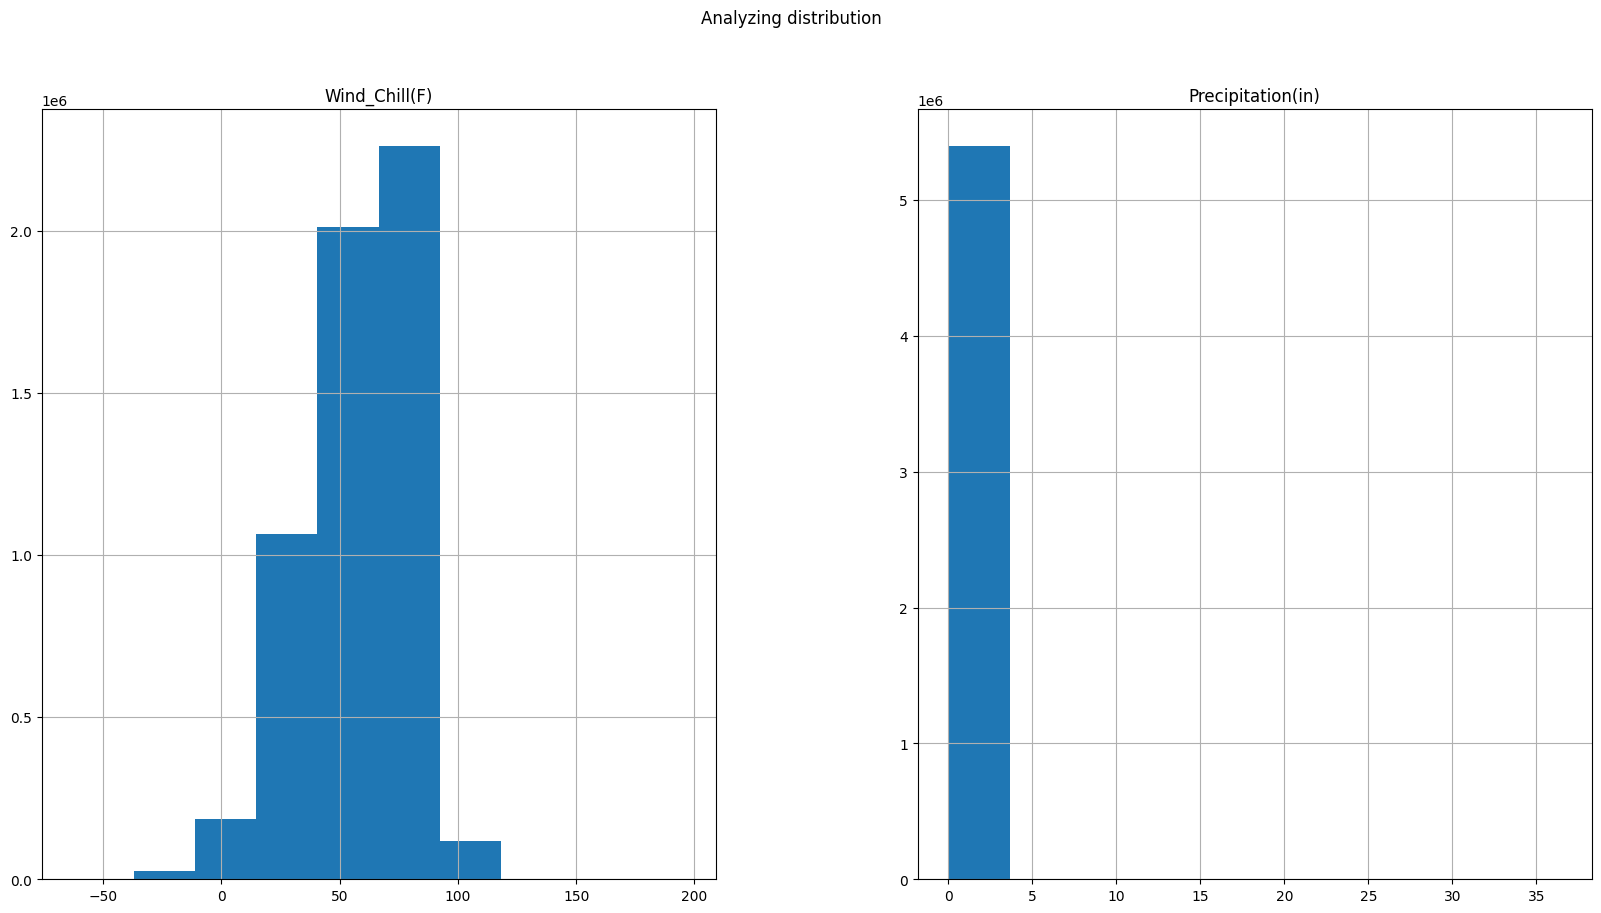

In [ ]:
data.hist(
    column=['Wind_Chill(F)', 'Precipitation(in)'],
    figsize=(20, 10)
)
pylab.suptitle("Analyzing distribution", fontsize="large")

In [ ]:
data = data.drop(['Precipitation(in)'], axis=1)

In [ ]:
data = data.dropna(subset=['Wind_Chill(F)'])

In [ ]:
missing = pd.DataFrame(data.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / data.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)


In [ ]:
print("The shape of data is:",(data.shape))

The shape of data is: (5667054, 36)


In [ ]:
print("Wind Direction: ", data['Wind_Direction'].unique())

Wind Direction:  ['SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'Variable' 'North'
 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' 'S' 'VAR' 'CALM' 'N']


<Axes: xlabel='Wind_Direction'>

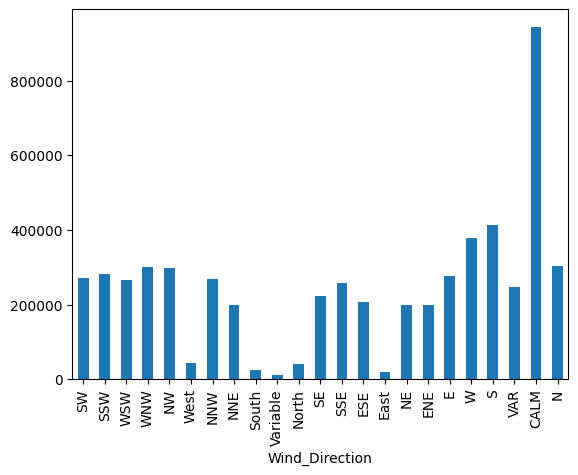

In [ ]:
pd.Series(data['Wind_Direction']).value_counts(sort=False).plot(kind='bar')

In [ ]:
data.loc[data['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
data.loc[(data['Wind_Direction']=='West')|(data['Wind_Direction']=='WSW')|(data['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
data.loc[(data['Wind_Direction']=='South')|(data['Wind_Direction']=='SSW')|(data['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
data.loc[(data['Wind_Direction']=='North')|(data['Wind_Direction']=='NNW')|(data['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
data.loc[(data['Wind_Direction']=='East')|(data['Wind_Direction']=='ESE')|(data['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
data = data[(data["Wind_Direction"].str.contains('VAR') |data["Wind_Direction"].str.contains('Variable'))== False]
print("Wind Direction after simplification: ", data['Wind_Direction'].unique())

Wind Direction after simplification:  ['SW' 'S' 'W' 'NW' 'N' 'SE' 'E' 'NE' 'CALM']


In [ ]:
weather ='!'.join(data['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4324\253030921.py:3: SyntaxWarning: invalid escape sequence '\s'
  "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()


Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Sleet', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Nearby', 'Snow Showers', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Widespread Dust', 'Wi

In [ ]:
data.loc[(data['Weather_Condition'].str.contains('Clear')|data['Weather_Condition'].str.contains('Fair')),'Weather_Condition']='Clear'
data.loc[(data['Weather_Condition'].str.contains('Cloud')|data['Weather_Condition'].str.contains('Overcast')),'Weather_Condition']='Cloud'
data.loc[(data['Weather_Condition'].str.contains('Rain')|data['Weather_Condition'].str.contains('Drizzle')|data['Weather_Condition'].str.contains('Showers in the Vicinity')),'Weather_Condition']='Rain'
data.loc[(data['Weather_Condition'].str.contains('Dust')|data['Weather_Condition'].str.contains('Smoke')|data['Weather_Condition'].str.contains('Sand')|data['Weather_Condition'].str.contains('Ash')),'Weather_Condition']='Dust'
data.loc[(data['Weather_Condition'].str.contains('Heavy Rain')|data['Weather_Condition'].str.contains('Rain Shower')|data['Weather_Condition'].str.contains('T-Storm')|data['Weather_Condition'].str.contains('Thunder')|data['Weather_Condition'].str.contains('Tornado')),'Weather_Condition']='Heavy_Rain'
data.loc[(data['Weather_Condition'].str.contains('Hail')|data['Weather_Condition'].str.contains('Snow')|data['Weather_Condition'].str.contains('Sleet')|data['Weather_Condition'].str.contains('Wintry')|data['Weather_Condition'].str.contains('Ice')),'Weather_Condition']='Snow'
data.loc[(data['Weather_Condition'].str.contains('Heavy Snow')|data['Weather_Condition'].str.contains('Heavy Sleet')|data['Weather_Condition'].str.contains('Heavy Ice Pellets')|data['Weather_Condition'].str.contains('Snow Showers')|data['Weather_Condition'].str.contains('Squalls')|data['Weather_Condition'].str.contains('Wintry')),'Weather_Condition']='Heavy_Snow'
data.loc[(data['Weather_Condition'].str.contains('Fog')|data['Weather_Condition'].str.contains('Mist')|data['Weather_Condition'].str.contains('Haze')),'Weather_Condition']='Fog'
#More to do here

data = data[data['Weather_Condition'] != ""]
data = data[data['Weather_Condition'] != "N/A Precipitation"]

weather ='!'.join(data['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4324\1063879987.py:16: SyntaxWarning: invalid escape sequence '\s'
  "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()


Weather Conditions:  ['Clear', 'Cloud', 'Dust', 'Fog', 'Heavy_Rain', 'Heavy_Snow', 'Rain', 'Snow']


# Insights

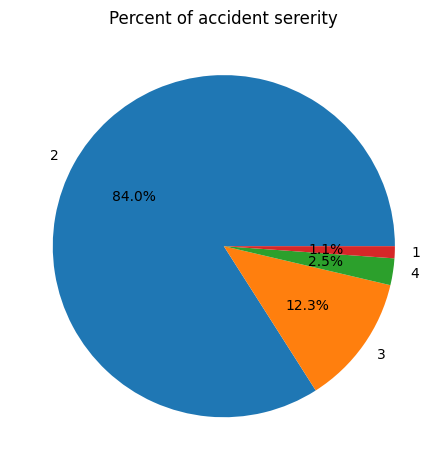

In [ ]:
s = data['Severity'].value_counts()
plt.pie(s,labels = s.index,
        autopct='%1.1f%%',
        startangle=0)
plt.title("Percent of accident sererity")
plt.tight_layout()
plt.show()

In [ ]:
data.Severity.value_counts()
data.loc[(data['Severity'] <= 2), 'Severity'] = 0
data.loc[(data['Severity'] >= 3), 'Severity'] = 1

data.Severity.value_counts()

Severity
0    4603657
1     802045
Name: count, dtype: int64

In [ ]:
def resampleData(df,col,n=10000):
  return pd.concat([df[df[col]==1].sample(n, replace = True),
                   df[df[col]==0].sample(n)], axis=0)

In [ ]:
re_df = resampleData(data,'Severity',1000000)
print("Resample Data: ",re_df.Severity.value_counts())

Resample Data:  Severity
1    1000000
0    1000000
Name: count, dtype: int64


Let's Explore the data

## Time Feature

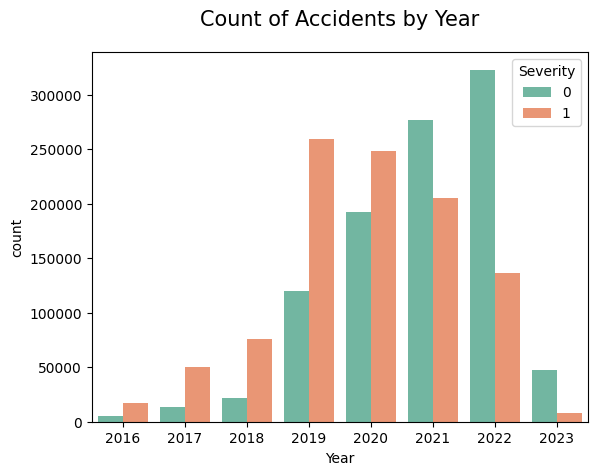

In [ ]:
sns.countplot(x='Year', hue='Severity', data= re_df,palette="Set2")
plt.title('Count of Accidents by Year', size=15, y=1.05)
plt.show()

In [ ]:
data = data.loc[data['Year'] >= 2019]
data['Severity'].value_counts()

re_df = resampleData(data,'Severity',800000)

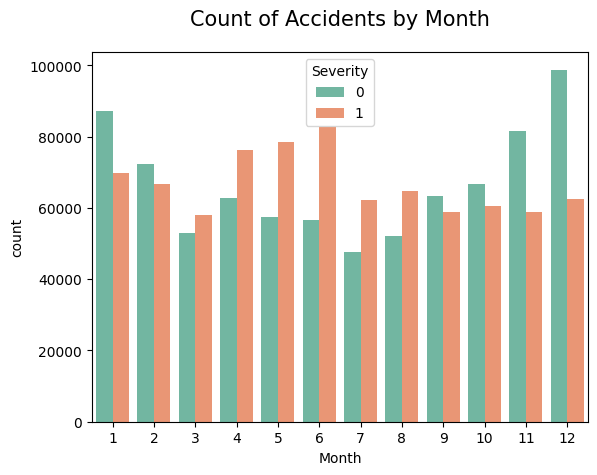

In [ ]:
sns.countplot(x='Month', hue='Severity', data = re_df,palette="Set2")
plt.title('Count of Accidents by Month', size=15, y=1.05)
plt.show()

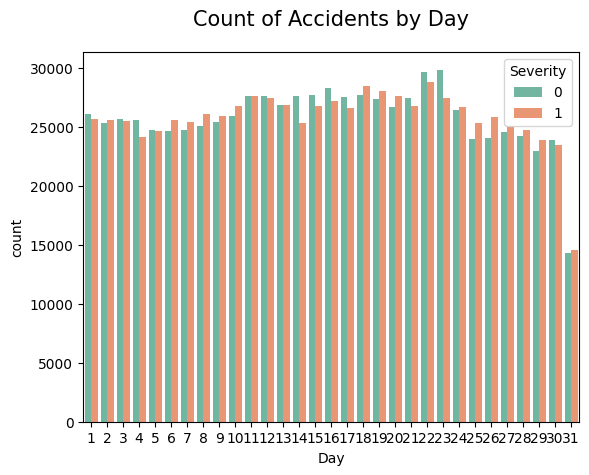

In [ ]:
sns.countplot(x='Day', hue='Severity', data= re_df,palette="Set2")
plt.title('Count of Accidents by Day', size=15, y=1.05)
plt.show()

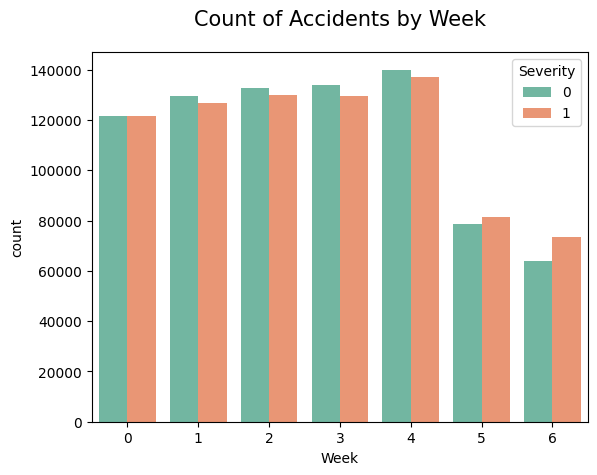

In [ ]:
sns.countplot(x='Week', hue='Severity', data= re_df,palette="Set2")
plt.title('Count of Accidents by Week', size=15, y=1.05)
plt.show()

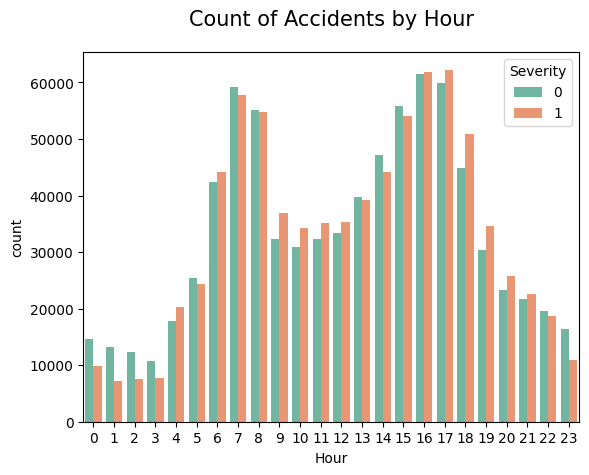

In [ ]:
sns.countplot(x='Hour', hue='Severity', data= re_df,palette="Set2")
plt.title('Count of Accidents by Hour', size=15, y=1.05)
plt.show()

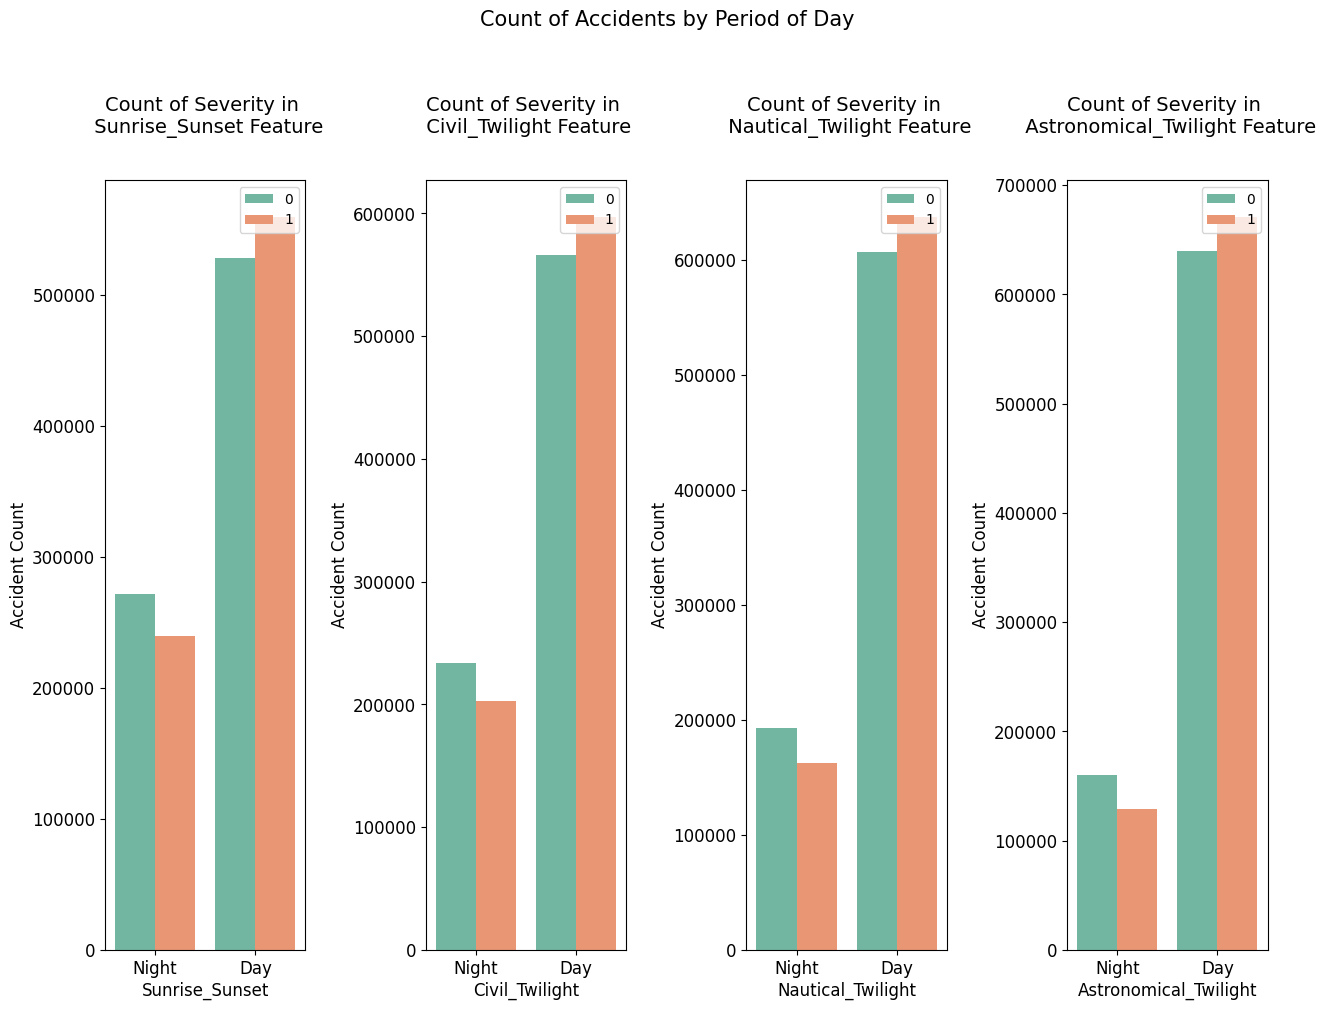

In [ ]:
# Assuming `data` is your DataFrame and has 'Weather_Condition' and 'Severity' columns.
period_of_day = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']


fig, axs = plt.subplots(1, 4, figsize=(15, 10))  # Create a 3x3 grid
plt.subplots_adjust(hspace=0.4, wspace=0.6)      # Adjust spacing

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot for each feature
for i, feature in enumerate(period_of_day):
    re_df = re_df.reset_index(drop=True)

    # Create a countplot in the current axis
    sns.countplot(ax=axs[i], x = feature, hue='Severity', data=re_df, palette="Set2")

    axs[i].set_xlabel(f'{feature}', size=12, labelpad=3)
    axs[i].set_ylabel('Accident Count', size=12, labelpad=3)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)
    axs[i].legend(['0', '1'], loc='upper right', prop={'size': 10})
    axs[i].set_title(f'Count of Severity in \n {feature} Feature', size=14, y=1.05)

# Hide unused subplots
for j in range(len(weather), len(axs)):
    fig.delaxes(axs[j])

# Add a global title
fig.suptitle('Count of Accidents by Period of Day', fontsize=15,y=1.05)
plt.show()

In [ ]:
data = data.drop(['Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

## Location Feature

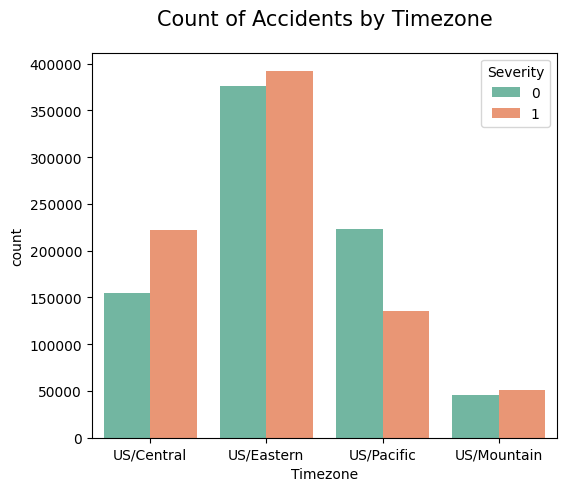

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Timezone', hue='Severity', data=re_df ,palette="Set2")
plt.title("Count of Accidents by Timezone", size=15, y=1.05)
plt.show()

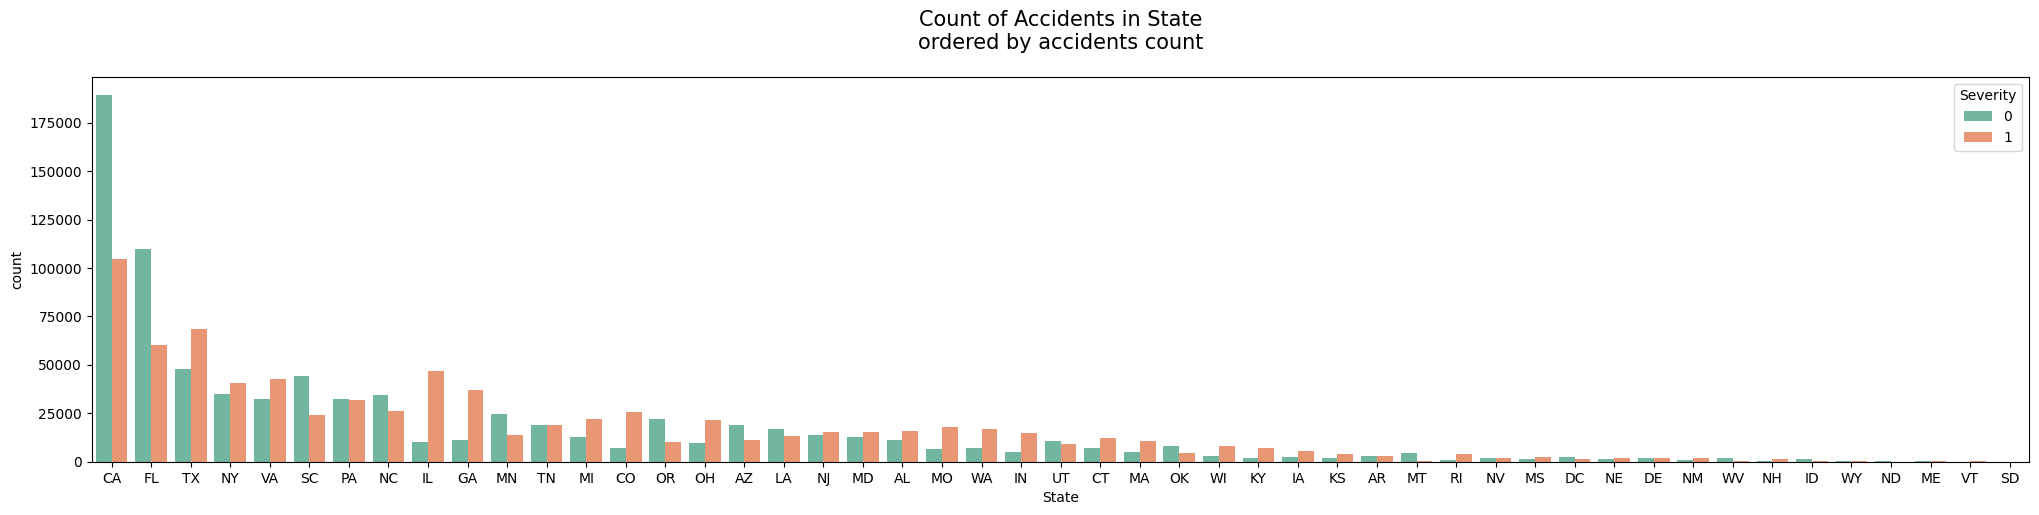

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(x='State', hue='Severity',
                      data=re_df ,palette="Set2", order=re_df['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents count", size=15, y=1.05)
plt.show()

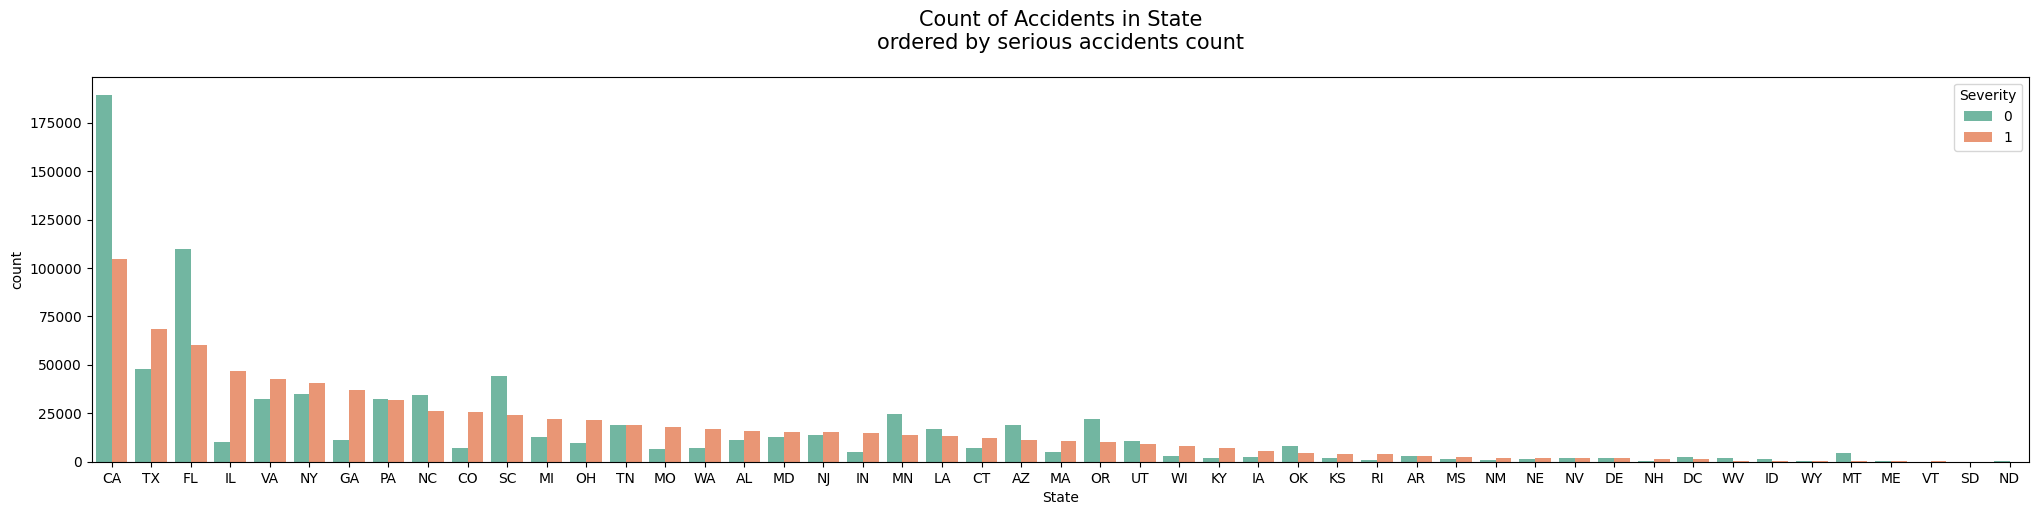

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(x='State', hue='Severity', data=re_df ,palette="Set2", order=re_df[re_df['Severity']==1]['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by serious accidents count", size=15, y=1.05)
plt.show()

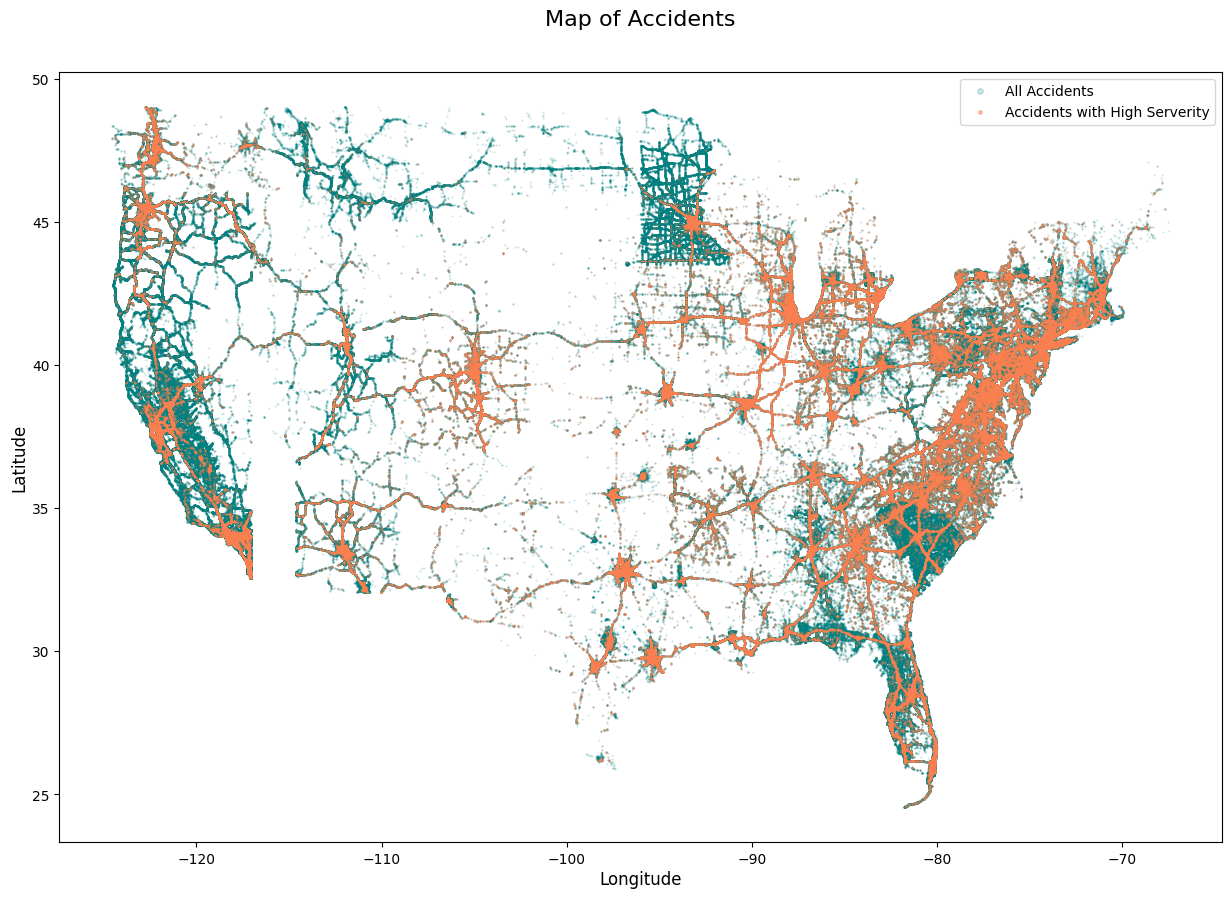

In [ ]:
df_4 = data[data['Severity']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=data, linestyle='', marker='o', markersize=0.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=0.3, color="coral", alpha=0.5, label='Accidents with High Serverity')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

## Weather Feature

In [ ]:
# extreamly skewed distribution
data['Pressure_bc']= boxcox(data['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
data['Visibility_bc']= boxcox(data['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
data['Wind_Speed_bc']= boxcox(data['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
data = data.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

re_df = resampleData(data,'Severity',800000)

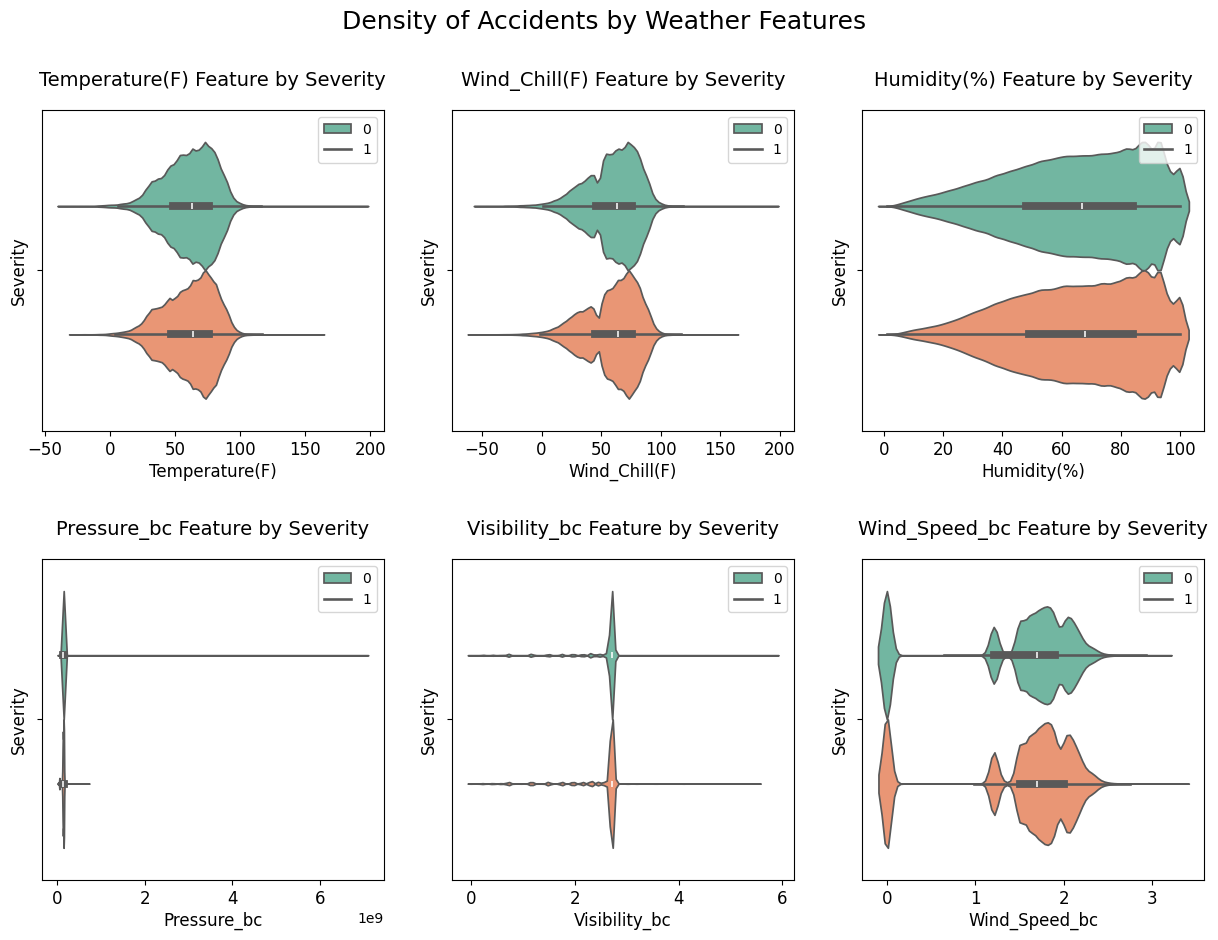

In [ ]:
# Assuming `data` is your DataFrame and has 'Weather_Condition' and 'Severity' columns.

num_features = ["Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure_bc","Visibility_bc","Wind_Speed_bc"]

fig, axs = plt.subplots(2,3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)

axs = axs.flatten()

for i, feature in enumerate(num_features):

    sns.violinplot(ax = axs[i], x=feature, hue="Severity", data=re_df, palette="Set2")

    axs[i].set_xlabel(f'{feature}', size=12, labelpad=3)
    axs[i].set_ylabel('Severity', size=12, labelpad=3)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

    axs[i].legend(['0', '1'], loc='upper right', prop={'size': 10})
    axs[i].set_title(f'{feature} Feature by Severity', size=14, y=1.05)

fig.suptitle('Density of Accidents by Weather Features', fontsize=18)
plt.show()

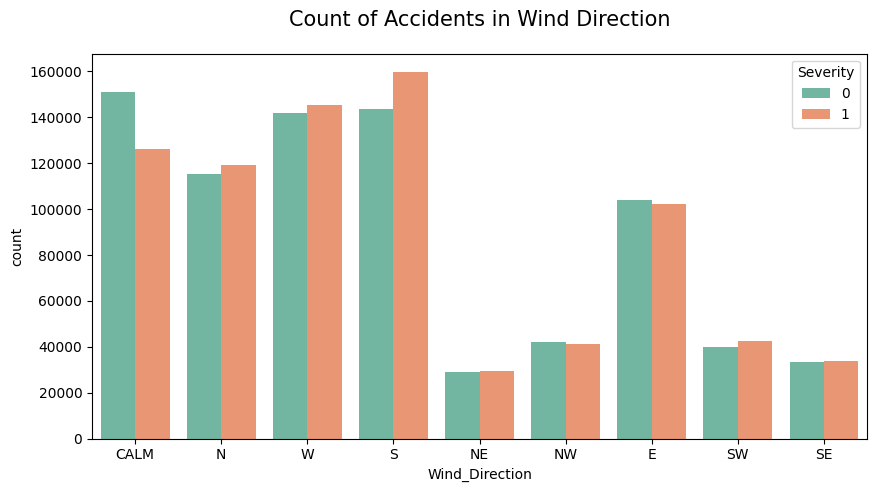

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity', data=re_df ,palette="Set2")
plt.title("Count of Accidents in Wind Direction", size=15, y=1.05)
plt.show()

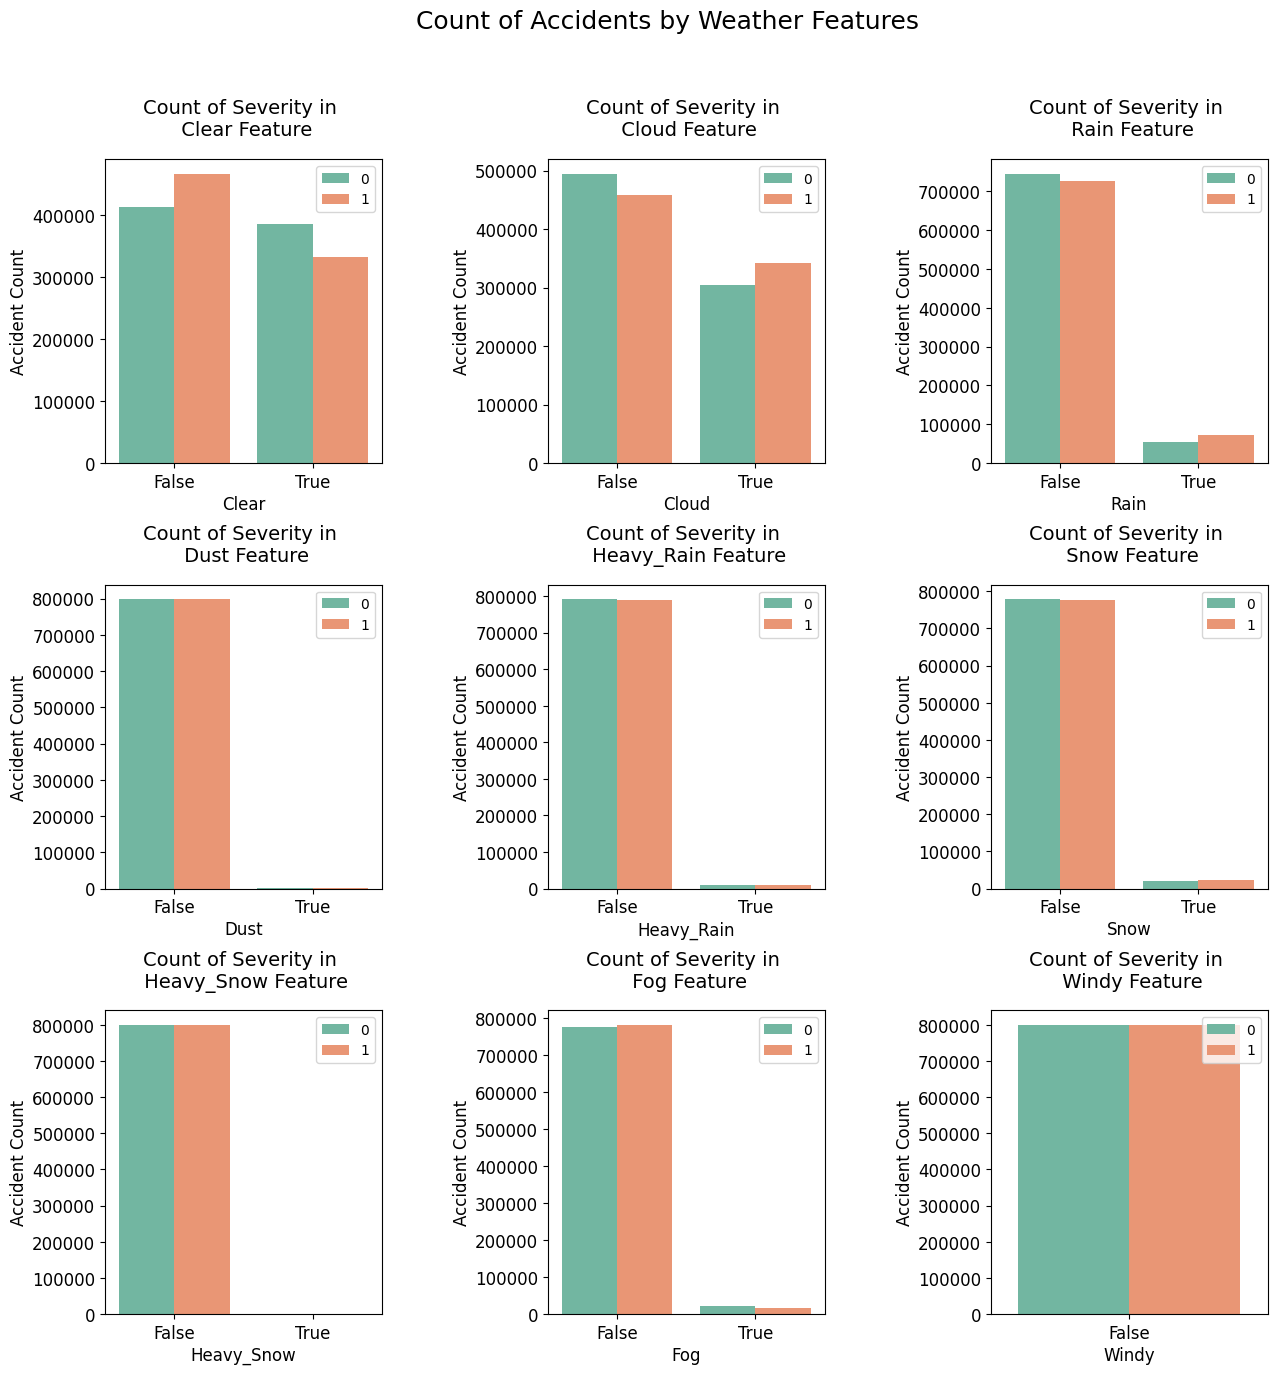

In [ ]:
# Assuming `data` is your DataFrame and has 'Weather_Condition' and 'Severity' columns.
weather = ['Clear', 'Cloud', 'Rain', 'Dust', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog','Windy']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid
plt.subplots_adjust(hspace=0.4, wspace=0.6)      # Adjust spacing

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot for each feature
for i, feature in enumerate(weather):
    # Add a new column to indicate the condition for the feature
    re_df[feature] = re_df['Weather_Condition'] == feature

    # Create a countplot in the current axis
    sns.countplot(ax=axs[i], x=feature, hue='Severity', data=re_df, palette="Set2")

    axs[i].set_xlabel(f'{feature}', size=12, labelpad=3)
    axs[i].set_ylabel('Accident Count', size=12, labelpad=3)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)
    axs[i].legend(['0', '1'], loc='upper right', prop={'size': 10})
    axs[i].set_title(f'Count of Severity in \n {feature} Feature', size=14, y=1.05)

    # Drop the column to clean up
    re_df = re_df.drop([feature], axis=1)

# Hide unused subplots
for j in range(len(weather), len(axs)):
    fig.delaxes(axs[j])

# Add a global title
fig.suptitle('Count of Accidents by Weather Features', fontsize=18)
plt.show()

In [ ]:
data = data.loc[data['Weather_Condition'] != "Fog"]
data = data.loc[data['Weather_Condition'] != "Windy"]
data = data.loc[data['Weather_Condition'] != "Dust"]

print(data['Severity'].value_counts())

re_df = resampleData(data,'Severity',700000)

Severity
0    4282507
1     671647
Name: count, dtype: int64


## Point Of Interest (POI) Feature

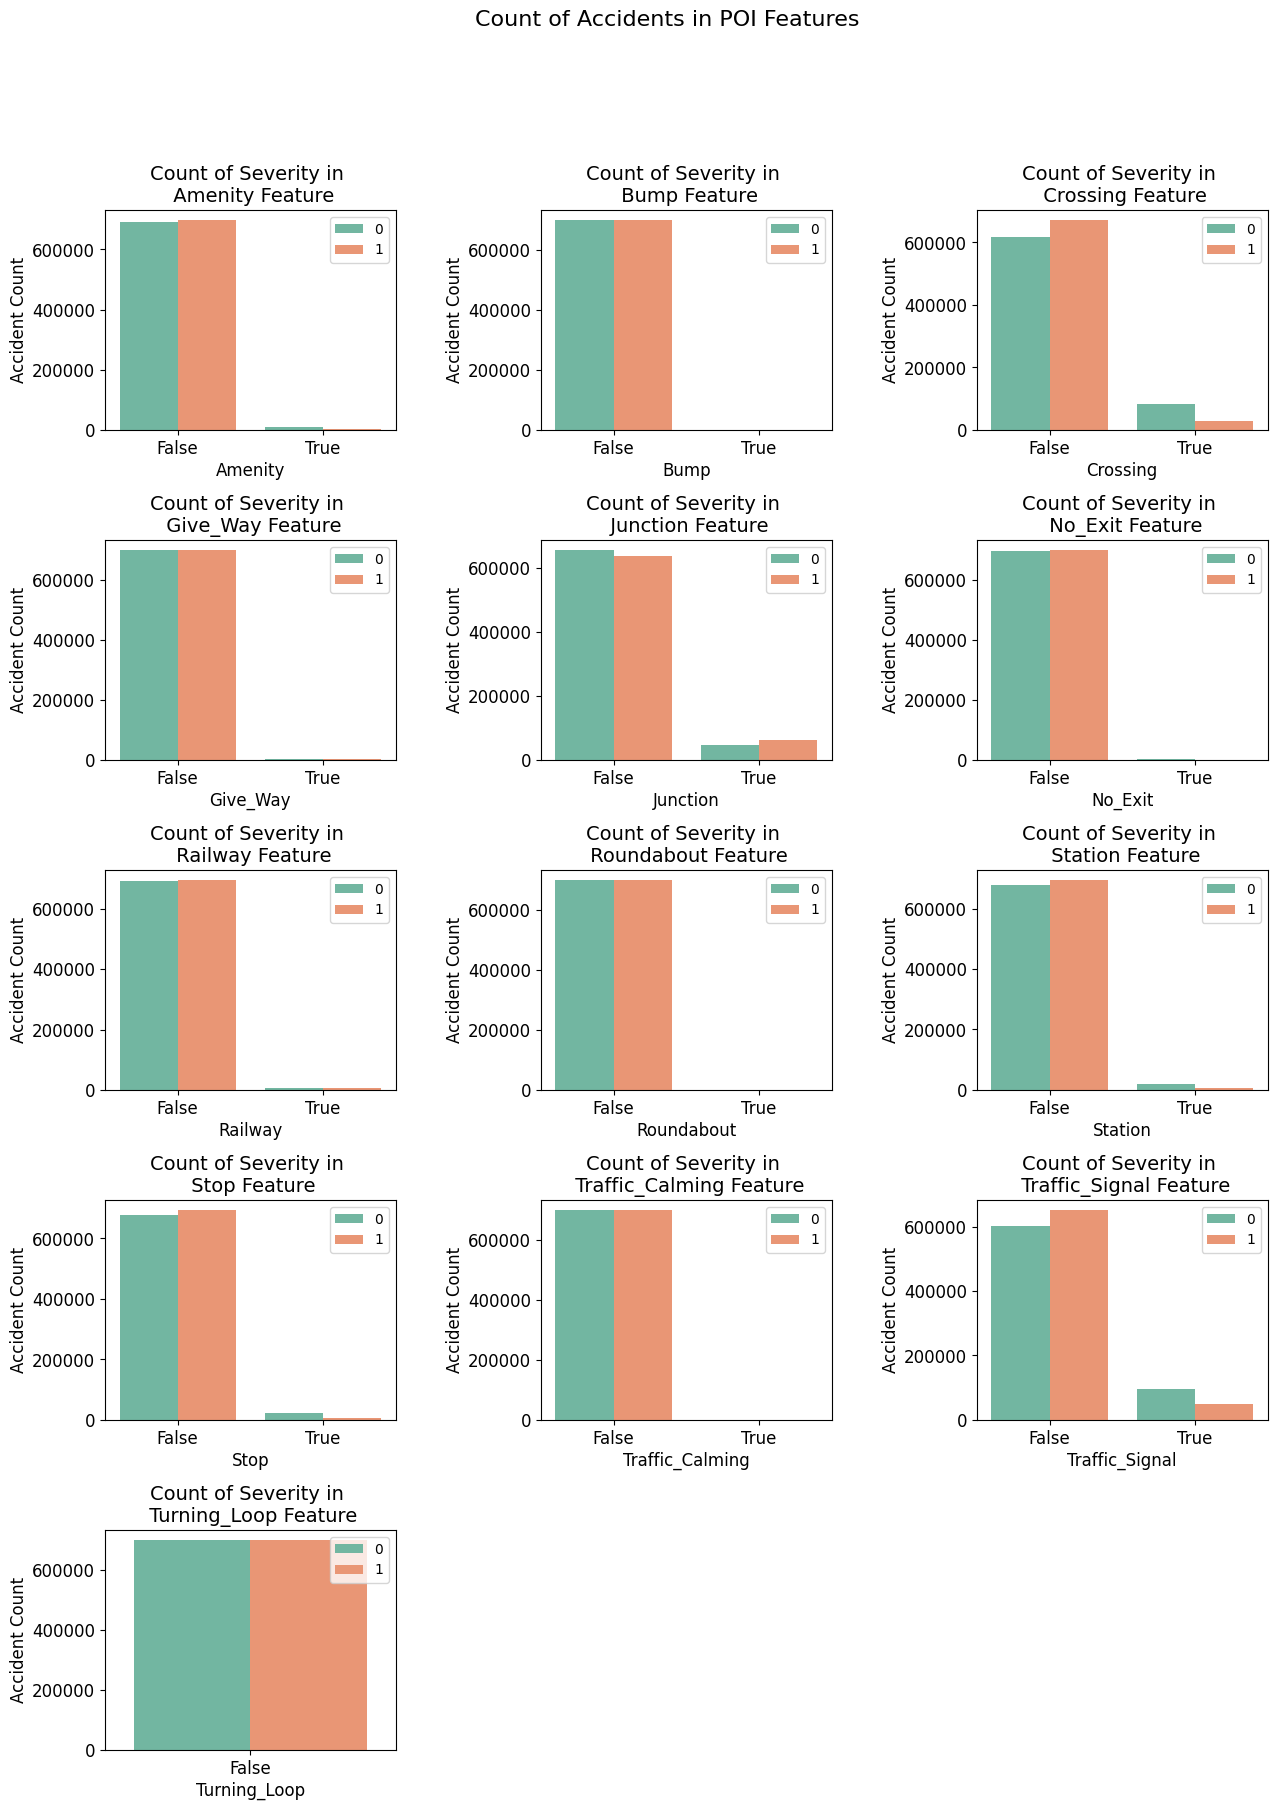

In [ ]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5,wspace = 0.5)

axs = axs.flatten()

for i, feature in enumerate(POI_features):

    sns.countplot(ax=axs[i], x=feature, hue='Severity', data=re_df, palette="Set2")

    axs[i].set_xlabel(f'{feature}', size=12, labelpad=3)
    axs[i].set_ylabel('Accident Count', size=12, labelpad=3)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)
    axs[i].legend(['0', '1'], loc='upper right', prop={'size': 10})
    axs[i].set_title(f'Count of Severity in \n {feature} Feature', size=14)

# Hide unused subplots
for j in range(len(POI_features), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Count of Accidents in POI Features', fontsize=16)
plt.show()

In [ ]:
data = data.drop(['Amenity','Bump','Give_Way',"No_Exit","Railway","Roundabout","Traffic_Calming","Turning_Loop"], axis  = 1)

## Correlation

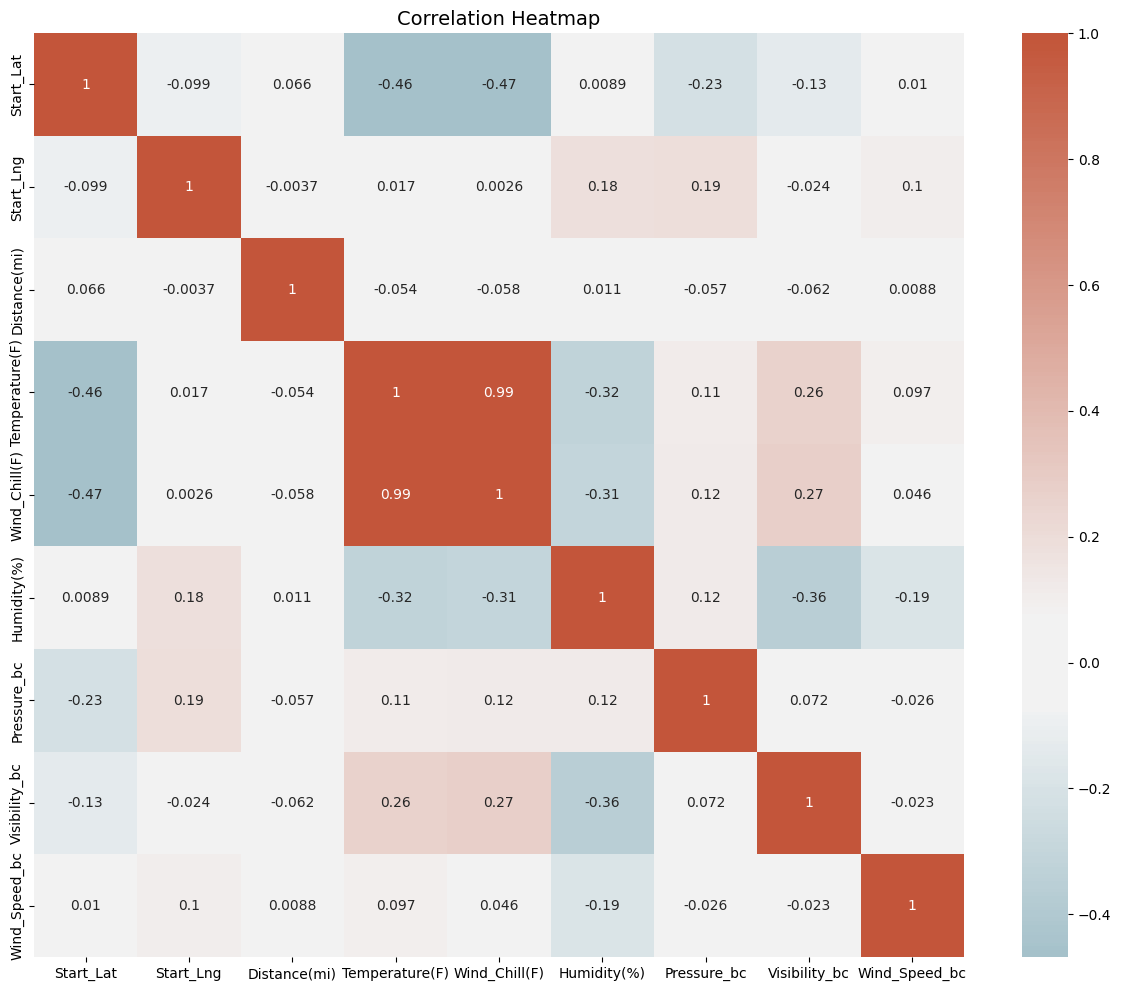

In [ ]:
continous_data = data[["Start_Lat","Start_Lng","Distance(mi)","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure_bc","Visibility_bc","Wind_Speed_bc"]]

data['Severity'] = data['Severity'].astype(int)
plt.figure(figsize=(15,12))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(continous_data.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
data = data.drop(['Wind_Chill(F)'],axis=1)

# Transform 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954154 entries, 512217 to 7728393
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Distance(mi)       float64
 4   State              object 
 5   Timezone           object 
 6   Temperature(F)     float64
 7   Humidity(%)        float64
 8   Wind_Direction     object 
 9   Weather_Condition  object 
 10  Crossing           bool   
 11  Junction           bool   
 12  Station            bool   
 13  Stop               bool   
 14  Traffic_Signal     bool   
 15  Sunrise_Sunset     object 
 16  Year               int32  
 17  Month              int32  
 18  Day                int32  
 19  Hour               int32  
 20  Week               int32  
 21  Pressure_bc        float64
 22  Visibility_bc      float64
 23  Wind_Speed_bc      float64
dtypes: bool(5), float64(8), int32(5), int64(1), object

In [ ]:
data['Is_Complex_Road'] = data[['Junction', 'Crossing']].sum(axis=1).apply(lambda x: True if x > 0 else False) 
data = data.drop(['Junction','Crossing'],axis=1)
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].apply(lambda x: True if x == 'Day' else False) 

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categories_features = ['State']

for feature in categories_features:
  data[feature] = encoder.fit_transform(data[feature])
  
data = pd.get_dummies(data, columns=['Weather_Condition', 'Wind_Direction', 'Timezone'], drop_first=True)
data.columns = data.columns.str.replace('/', '_')
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),State,Temperature(F),Humidity(%),Station,Stop,Traffic_Signal,...,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_W,Timezone_US_Eastern,Timezone_US_Mountain,Timezone_US_Pacific
512217,0,41.946796,-88.208092,0.00,12,58.0,90.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
512218,0,34.521172,-117.958076,0.00,3,86.0,28.0,False,False,False,...,False,False,False,False,False,False,True,False,False,True
512219,0,37.542839,-77.441780,0.00,43,68.0,96.0,False,False,True,...,True,False,False,False,False,False,False,True,False,False
512220,0,40.896629,-81.178452,0.00,33,62.0,86.0,False,False,False,...,True,False,False,False,False,False,False,True,False,False
512221,0,41.409359,-81.644318,1.91,33,63.0,87.0,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
# Convert int columns (int32, int64) to float64
int_cols = data.select_dtypes(include=['int32', 'int64']).columns
data[int_cols] = data[int_cols].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954154 entries, 512217 to 7728393
Data columns (total 36 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Severity                      float64
 1   Start_Lat                     float64
 2   Start_Lng                     float64
 3   Distance(mi)                  float64
 4   State                         float64
 5   Temperature(F)                float64
 6   Humidity(%)                   float64
 7   Station                       bool   
 8   Stop                          bool   
 9   Traffic_Signal                bool   
 10  Sunrise_Sunset                bool   
 11  Year                          float64
 12  Month                         float64
 13  Day                           float64
 14  Hour                          float64
 15  Week                          float64
 16  Pressure_bc                   float64
 17  Visibility_bc                 float64
 18  Wind_Speed_bc         

# Model

In [ ]:
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from lightgbm import LGBMClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
from sklearn.preprocessing import LabelEncoder # Cần cho phần chuẩn bị MLP
from sklearn.utils import class_weight as sk_class_weight # Để tránh nhầm tên

import time

In [ ]:
data.to_csv('data/processedData.csv', index=False)  

In [ ]:
data = pd.read_csv('data/processedData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954154 entries, 0 to 4954153
Data columns (total 36 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Severity                      float64
 1   Start_Lat                     float64
 2   Start_Lng                     float64
 3   Distance(mi)                  float64
 4   State                         float64
 5   Temperature(F)                float64
 6   Humidity(%)                   float64
 7   Station                       bool   
 8   Stop                          bool   
 9   Traffic_Signal                bool   
 10  Sunrise_Sunset                bool   
 11  Year                          float64
 12  Month                         float64
 13  Day                           float64
 14  Hour                          float64
 15  Week                          float64
 16  Pressure_bc                   float64
 17  Visibility_bc                 float64
 18  Wind_Speed_bc         

In [ ]:
def getResult(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print('Accuracy:',accuracy)
  print('Precision:',precision)
  print('Recall:', recall)
  print('F1 score:',f1)
  print('Confusion matrix:')
  print(confusion_matrix(y_test, y_pred))
  return [accuracy,precision,recall,f1]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954154 entries, 0 to 4954153
Data columns (total 36 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Severity                      float64
 1   Start_Lat                     float64
 2   Start_Lng                     float64
 3   Distance(mi)                  float64
 4   State                         float64
 5   Temperature(F)                float64
 6   Humidity(%)                   float64
 7   Station                       bool   
 8   Stop                          bool   
 9   Traffic_Signal                bool   
 10  Sunrise_Sunset                bool   
 11  Year                          float64
 12  Month                         float64
 13  Day                           float64
 14  Hour                          float64
 15  Week                          float64
 16  Pressure_bc                   float64
 17  Visibility_bc                 float64
 18  Wind_Speed_bc         

In [ ]:
# split X, y
X = data.drop('Severity', axis=1)
y= data['Severity']

# split train, test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train.head()

,Start_Lat,Start_Lng,Distance(mi),State,Temperature(F),Humidity(%),Station,Stop,Traffic_Signal,Sunrise_Sunset,...,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_W,Timezone_US_Eastern,Timezone_US_Mountain,Timezone_US_Pacific
855257,35.157421,-81.479774,0.000,38.0,49.0,97.0,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4566819,37.750689,-122.151759,0.000,3.0,69.0,54.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3991577,25.929726,-80.311629,0.028,8.0,73.0,20.0,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
2604498,33.774246,-118.007416,3.192,3.0,66.0,94.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2464591,47.094777,-110.158600,0.734,24.0,20.0,71.0,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
numerical_cols_mlp = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Year', 'Month', 'Day', 'Hour', 'Week', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc'] # Kiểm tra lại


scaler = StandardScaler()
X_train[numerical_cols_mlp] = scaler.fit_transform(X_train[numerical_cols_mlp])
X_test[numerical_cols_mlp] = scaler.transform(X_test[numerical_cols_mlp])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
if pos_count > 0:
    scale_pos_weight_value = neg_count / pos_count
    print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")
else:
    scale_pos_weight_value = 1 # Giá trị mặc định nếu không có lớp dương
    print("Warning: No positive samples found in y_train. Setting scale_pos_weight to 1.")

Calculated scale_pos_weight: 6.38


## LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=0, class_weight='balanced', max_iter=1000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
lr_result = ['Logistic Regression'] + getResult(y_test,y_pred)

Accuracy: 0.6772440919981672
Precision: 0.2460997891777934
Recall: 0.6691365499717113
F1 score: 0.35985101734972624
Confusion matrix:
[[871725 413028]
 [ 66667 134827]]


## Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

In [ ]:
nb_result = ['Naive Bayes'] + getResult(y_test,y_pred)

Accuracy: 0.7950818403670453
Precision: 0.26660688324569626
Recall: 0.29214765700219364
F1 score: 0.2787935333691696
Confusion matrix:
[[1122822  161931]
 [ 142628   58866]]


## Decision Tree

In [ ]:
dstree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42, class_weight='balanced')
dstree.fit(X_train, y_train)
y_pred = dstree.predict(X_test)

In [ ]:
dstree_result = ['Decision Tree'] + getResult(y_test,y_pred)

Accuracy: 0.7891891455457942
Precision: 0.3746522258665489
Recall: 0.8293745719475518
F1 score: 0.5161463682060706
Confusion matrix:
[[1005816  278937]
 [  34380  167114]]


## Random Forest

In [ ]:
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42,  class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
rf_result = ['Random Forest'] + getResult(y_test,y_pred)

Accuracy: 0.7784924040216734
Precision: 0.3584899806993013
Recall: 0.802897356745114
F1 score: 0.49566694700914404
Confusion matrix:
[[995253 289500]
 [ 39715 161779]]


## XGBoost

In [ ]:
xgb = XGBClassifier(random_state=42,
                    scale_pos_weight=scale_pos_weight_value,
                    n_estimators=100, # Có thể tăng/giảm để thử nghiệm
                    max_depth=5,      # Có thể thay đổi
                    # use_label_encoder=False,
                    eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [ ]:
print("Evaluating XGBoost Classifier:")
xgb_result = ['XGBoost'] + getResult(y_test, y_pred_xgb)

Evaluating XGBoost Classifier:
Accuracy: 0.8158960119011174
Precision: 0.4117533350950857
Recall: 0.8351464559738752
F1 score: 0.5515669198168404
Confusion matrix:
[[1044346  240407]
 [  33217  168277]]


## LightGBM Classifier

In [ ]:
lgbm = LGBMClassifier(random_state=42,
                      scale_pos_weight=scale_pos_weight_value,
                      n_estimators=100, # Có thể tăng/giảm
                      max_depth=5,       # Có thể thay đổi (hoặc dùng num_leaves)
                      device='gpu'
                     )
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 470153, number of negative: 2997754
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 3467907, number of used features: 35
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (52.92 MB) transferred to GPU in 0.126204 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135573 -> initscore=-1.852560
[LightGBM] [Info] Start training from score -1.852560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


e:\coding\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Evaluating LightGBM Classifier:")
lgbm_result = ['LightGBM'] + getResult(y_test, y_pred_lgbm)

Evaluating LightGBM Classifier:
Accuracy: 0.7922027765236869
Precision: 0.37828264044485166
Recall: 0.8278459904513286
F1 score: 0.5192808778893299
Confusion matrix:
[[1010603  274150]
 [  34688  166806]]


### With SMOTE

In [ ]:
print("\n--- Testing SMOTE ---")

# Tạo pipeline SMOTE + LGBM
smote_lgbm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42, n_estimators=100, max_depth=5)) # Bỏ scale_pos_weight
])

print("Training LGBM with SMOTE...")
# Huấn luyện pipeline trên dữ liệu gốc train (SMOTE chỉ áp dụng bên trong pipeline khi fit)
smote_lgbm_pipeline.fit(X_train, y_train) # Sử dụng X_train, y_train gốc (trước SMOTE)
y_pred_smote_lgbm = smote_lgbm_pipeline.predict(X_test)




--- Testing SMOTE ---
Training LGBM with SMOTE...
[LightGBM] [Info] Number of positive: 2997754, number of negative: 2997754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.390332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4794
[LightGBM] [Info] Number of data points in the train set: 5995508, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


e:\coding\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Evaluating LGBM with SMOTE:")
smote_lgbm_result = ['LGBM (SMOTE)'] + getResult(y_test, y_pred_smote_lgbm)

Evaluating LGBM with SMOTE:
Accuracy: 0.8600212481505429
Precision: 0.48681290800649185
Recall: 0.5999235709251889
F1 score: 0.5374817976678783
Confusion matrix:
[[1157323  127430]
 [  80613  120881]]


In [ ]:
RUN_HYPERPARAMETER_TUNING = True # Đặt thành True để chạy

if RUN_HYPERPARAMETER_TUNING:
    print("\n--- Starting Hyperparameter Tuning for LightGBM (Balanced) ---")
    # ===> BỔ SUNG: Tối ưu kiểu dữ liệu sang float32 <===
    print(f"Original X_train dtype: {X_train.dtype}")
    if hasattr(X_train, 'dtype') and X_train.dtype == 'float64':
        try:
            print("Converting X_train and X_test to float32 to save memory...")
            X_train = X_train.astype(np.float32)
            X_test = X_test.astype(np.float32) # Quan trọng: đổi cả X_test
            print(f"Converted X_train dtype to: {X_train.dtype}")
            gc.collect() # Gọi thu gom rác
        except Exception as e:
            print(f"Warning: Could not convert dtype to float32: {e}")
    # ===================================================

    # ===> BỔ SUNG: Lấy mẫu nhỏ hơn cho tuning <===
    SAMPLE_SIZE_TUNING = 0.15 # Ví dụ: dùng 15% dữ liệu train để tuning (điều chỉnh nếu cần)
    # Kiểm tra nếu kích thước mẫu > kích thước dữ liệu gốc (trường hợp dữ liệu rất nhỏ)
    actual_sample_size = min(SAMPLE_SIZE_TUNING, 1.0)
    print(f"Taking {actual_sample_size*100:.1f}% sample of training data for tuning...")
    X_train_tune, _, y_train_tune, _ = train_test_split(
        X_train, y_train,
        train_size=actual_sample_size,
        random_state=42,
        stratify=y_train # Giữ tỷ lệ lớp trong mẫu
    )
    print(f"Tuning will be performed on a sample of size: {X_train_tune.shape[0]}")
    # ============================================

    # Định nghĩa không gian tham số cần tìm kiếm (giữ nguyên)
    param_distributions = {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [20, 31, 40, 50],
        'max_depth': [-1, 5, 7, 10],
        'reg_alpha': [0, 0.1, 0.5, 1],
        'reg_lambda': [0, 0.1, 0.5, 1],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'subsample': [0.7, 0.8, 0.9, 1.0],
    }

    # Khởi tạo mô hình cơ sở với scale_pos_weight đã tính (giữ nguyên)
    # Đảm bảo lgbm_base cũng dùng dtype phù hợp nếu cần (thường thì không cần rõ ràng)
    lgbm_base = LGBMClassifier(device='gpu',random_state=42, scale_pos_weight=scale_pos_weight_value)

    # Thiết lập StratifiedKFold (giữ nguyên)
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Thiết lập RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=lgbm_base,
        param_distributions=param_distributions,
        n_iter=30,  # ===> THAY ĐỔI: Giảm n_iter xuống 30 (có thể tăng lại nếu có tài nguyên)
        scoring='f1', # Hoặc 'recall'
        cv=cv_strategy,
        n_jobs=4,   # ===> THAY ĐỔI: Giảm n_jobs xuống 4 (hoặc 2, hoặc 1 nếu vẫn lỗi)
        random_state=42,
        verbose=2
    )

    print("Running Randomized Search CV on data sample...")
    start_time_tuning = time.time()
    try:
        # ===> THAY ĐỔI: Fit trên mẫu nhỏ hơn <===
        random_search.fit(X_train_tune, y_train_tune)
        tuning_duration = time.time() - start_time_tuning
        print(f"Tuning completed in {tuning_duration:.2f} seconds.")

        print(f"Best parameters found: {random_search.best_params_}")
        print(f"Best F1 score on CV (sample): {random_search.best_score_:.4f}")

        # Lấy mô hình tốt nhất VÀ huấn luyện lại trên TOÀN BỘ dữ liệu train
        print("\nTraining best model on full training data...")
        best_lgbm = random_search.best_estimator_ # Lấy cấu hình tốt nhất
        start_time_retrain = time.time()
        best_lgbm.fit(X_train, y_train) # Huấn luyện lại trên X_train đầy đủ
        retrain_duration = time.time() - start_time_retrain
        print(f"Retraining best model completed in {retrain_duration:.2f} seconds.")


        # Đánh giá mô hình tốt nhất trên tập test (giữ nguyên)
        y_pred_best_lgbm = best_lgbm.predict(X_test)
        print("\nEvaluating Best Tuned LightGBM (Balanced):")
        tuned_lgbm_result = ['LGBM (Balanced, Tuned)'] + getResult(y_test, y_pred_best_lgbm)

    except MemoryError as me:
        print("\nERROR: MemoryError occurred during RandomizedSearchCV even with sampling.")
        print("Consider further reducing SAMPLE_SIZE_TUNING, n_iter, n_jobs, or increasing system RAM.")
        tuned_lgbm_result = None
    except Exception as e:
        print(f"\nAn error occurred during RandomizedSearchCV: {e}")
        tuned_lgbm_result = None

else:
    print("\nSkipping Hyperparameter Tuning.")
    tuned_lgbm_result = None # Đặt là None nếu không chạy tuning


--- Starting Hyperparameter Tuning for LightGBM (Balanced) ---
Original X_train dtype: float32
Taking 15.0% sample of training data for tuning...
Tuning will be performed on a sample of size: 520186
Running Randomized Search CV on data sample...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 70523, number of negative: 449663
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 520186, number of used features: 34
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (7.94 MB) transferred to GPU in 0.018334 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135573 -> initscore=-1.85256

e:\coding\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Evaluating Best Tuned LightGBM (Balanced):
Accuracy: 0.8146660682914751
Precision: 0.4101958841500435
Recall: 0.8382780628703584
F1 score: 0.550845633556618
Confusion matrix:
[[1041887  242866]
 [  32586  168908]]


## MLP


In [ ]:
numerical_cols_mlp = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Year', 'Month', 'Day', 'Hour', 'Week', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc'] # Kiểm tra lại
categorical_cols_mlp = [col for col in data.columns if col not in numerical_cols_mlp and col != 'Severity']

data_mlp = data.copy() # Sử dụng data gốc trước khi LabelEncode/Scale cho các mô hình sklearn

# Chuẩn hóa cột số cho MLP
scaler_mlp = StandardScaler()
data_mlp[numerical_cols_mlp] = scaler_mlp.fit_transform(data_mlp[numerical_cols_mlp])

# Tách X và y cho MLP
X_mlp_df = data_mlp.drop('Severity', axis=1) # Giữ dạng DataFrame
y_mlp = data_mlp['Severity']

# Tách train/test cho MLP (sử dụng cùng random_state và stratify)
X_train_mlp_df, X_test_mlp_df, y_train_mlp, y_test_mlp = train_test_split(X_mlp_df, y_mlp, test_size=0.30, random_state=42, stratify=y_mlp)

# Định dạng lại X thành danh sách các input cho Keras
X_train_list = [X_train_mlp_df[numerical_cols_mlp].values]
X_test_list = [X_test_mlp_df[numerical_cols_mlp].values]
for col in categorical_cols_mlp:
    X_train_list.append(X_train_mlp_df[col].values)
    X_test_list.append(X_test_mlp_df[col].values)

# Tính class_weight cho Keras
class_weights_mlp = sk_class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train_mlp), y=y_train_mlp
)
class_weight_dict_mlp = dict(enumerate(class_weights_mlp))
print(f"Calculated class weights for Keras: {class_weight_dict_mlp}")

# Xây dựng mô hình MLP (Giữ kiến trúc cơ bản, thêm Dropout)
input_layers = []
embedding_layers = []
input_numeric = layers.Input(shape=(len(numerical_cols_mlp),), name='input_numeric')
input_layers.append(input_numeric)
embedding_layers.append(input_numeric)

for col in categorical_cols_mlp:
    num_unique_values = data_mlp[col].nunique() + 1
    embedding_dim = min(50, int(num_unique_values / 2))
    input_cat = layers.Input(shape=(1,), name=f'input_{col}')
    input_layers.append(input_cat)
    embedding = layers.Embedding(input_dim=num_unique_values, output_dim=embedding_dim, name=f'embedding_{col}')(input_cat)
    embedding = layers.Flatten(name=f'flatten_{col}')(embedding)
    embedding_layers.append(embedding)

merged_inputs = layers.concatenate(embedding_layers, name='concatenate_embeddings')
dense1 = layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), name='dense_1')(merged_inputs) # Thêm L2 reg
bn1 = layers.BatchNormalization(name='batchnorm_1')(dense1)
dropout1 = layers.Dropout(0.4, name='dropout_1')(bn1) # Tăng nhẹ Dropout
dense2 = layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), name='dense_2')(dropout1) # Thêm L2 reg
bn2 = layers.BatchNormalization(name='batchnorm_2')(dense2)
dropout2 = layers.Dropout(0.4, name='dropout_2')(bn2) # Tăng nhẹ Dropout
output_layer = layers.Dense(1, activation='sigmoid', name='output')(dropout2)
model_mlp = keras.Model(inputs=input_layers, outputs=output_layer)
model_mlp.summary()

# Biên dịch mô hình
model_mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), # Giữ Adam, lr mặc định
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

# ----- BỔ SUNG: Early Stopping -----
early_stopping = EarlyStopping(
    monitor='val_recall', # Theo dõi Recall trên tập validation
    patience=5,          # Dừng nếu Recall không cải thiện sau 5 epochs
    mode='max',          # Vì chúng ta muốn Recall càng cao càng tốt
    restore_best_weights=True # Khôi phục trọng số của epoch tốt nhất
)
# ----------------------------------

# Huấn luyện mô hình với Early Stopping
EPOCHS = 50 # Tăng số epochs vì có EarlyStopping
BATCH_SIZE = 1024
history = model_mlp.fit(
    X_train_list,
    y_train_mlp,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    class_weight=class_weight_dict_mlp,
    callbacks=[early_stopping], # Thêm callback EarlyStopping
    verbose=1
)

Calculated class weights for Keras: {0: np.float64(0.5784175419330605), 1: np.float64(3.6880621840124386)}


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_State         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Station       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Stop          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Traffic_Sign… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Sunrise_Suns… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Is_Complex_R… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Weather_Cond… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Weather_Cond… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Weather_Cond… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Weather_Cond… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Weather_Cond… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Wind_Directi… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Wind_Directi… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Wind_Directi… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Wind_Directi… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Wind_Directi… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_Wind_Directi… │ (None, 1)         │          0 │ -               

 Total params: 18,082 (70.63 KB)

 Trainable params: 17,698 (69.13 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
2710/2710 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.6963 - loss: 0.6465 - precision: 0.2703 - recall: 0.7132 - val_accuracy: 0.7701 - val_loss: 0.4936 - val_precision: 0.3493 - val_recall: 0.8009
Epoch 2/50
2710/2710 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7683 - loss: 0.4978 - precision: 0.3443 - recall: 0.7828 - val_accuracy: 0.7735 - val_loss: 0.4853 - val_precision: 0.3545 - val_recall: 0.8103
Epoch 3/50
2710/2710 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7715 - loss: 0.4899 - precision: 0.3492 - recall: 0.7898 - val_accuracy: 0.7796 - val_loss: 0.4615 - val_precision: 0.3609 - val_recall: 0.8056
Epoch 4/50
2710/2710 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7746 - loss: 0.4866 - precision: 0.3520 - recall: 0.7918 - val_accuracy: 0.8008 - val_loss: 0.4499 - val_precision: 0.3847 - val_recall: 0.7757
Epoch 5/50
2710/2710 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7752 - loss: 0.4860 - precision: 0.3527 - recall: 0.7932 - val_accuracy: 0.7679

In [ ]:
# Đánh giá mô hình MLP
print("\nEvaluating MLP with Early Stopping:")
y_pred_proba_mlp = model_mlp.predict(X_test_list)
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int)
mlp_result = ['MLP (Keras, ES)'] + getResult(y_test, y_pred_mlp)


Evaluating MLP with Early Stopping:
46446/46446 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step
Accuracy: 0.7682256044923892
Precision: 0.3493558270573708
Recall: 0.8228086196115021
F1 score: 0.4904652868993101
Confusion matrix:
[[975982 308771]
 [ 35703 165791]]


In [ ]:
# print("\n--- Simple Averaging Ensemble ---")

# # Lấy xác suất từ mô hình ML tốt nhất
# # Nếu đã chạy tuning và có kết quả tốt hơn:
# if RUN_HYPERPARAMETER_TUNING and tuned_lgbm_result is not None:
#      print("Using Tuned LGBM for Ensemble")
#      proba_ml = best_lgbm.predict_proba(X_test)[:, 1] # Lấy xác suất lớp 1
#      ml_model_name = "Tuned LGBM"
# # Nếu không tune hoặc tune không tốt hơn, dùng LGBM Balanced
# elif lgbm_result[4] > smote_lgbm_result[4]: # So sánh F1 score
#      print("Using Balanced LGBM for Ensemble")
#      proba_ml = lgbm.predict_proba(X_test)[:, 1]
#      ml_model_name = "Balanced LGBM"
# # Hoặc dùng SMOTE LGBM nếu nó tốt hơn
# else:
#      print("Using SMOTE LGBM for Ensemble")
#      proba_ml = smote_lgbm_pipeline.predict_proba(X_test)[:, 1]
#      ml_model_name = "SMOTE LGBM"


# # Lấy xác suất từ MLP
# proba_dl = y_pred_proba_mlp.flatten() # Flatten thành mảng 1D

# # Tính trung bình cộng xác suất
# proba_ensemble_avg = (proba_ml + proba_dl) / 2

# # Chuyển đổi xác suất trung bình thành nhãn
# y_pred_ensemble_avg = (proba_ensemble_avg > 0.5).astype(int)

# print(f"Evaluating Simple Averaging Ensemble ({ml_model_name} + MLP):")
# ensemble_avg_result = [f'Ensemble Avg ({ml_model_name[:4]} + MLP)'] + getResult(y_test, y_pred_ensemble_avg) # y_test gốc


--- Simple Averaging Ensemble ---
Using Tuned LGBM for Ensemble


e:\coding\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Evaluating Simple Averaging Ensemble (Tuned LGBM + MLP):
Accuracy: 0.8002142308781784
Precision: 0.3894542733567621
Recall: 0.8343325359564057
F1 score: 0.531031008106994
Confusion matrix:
[[1021203  263550]
 [  33381  168113]]


# Summary

In [ ]:
all_results_data = [
    lr_result,
    nb_result,
    dstree_result,
    rf_result,
    xgb_result,     # Kết quả XGBoost đã cân bằng
    lgbm_result,    # Kết quả LightGBM đã cân bằng
    smote_lgbm_result,       # Kết quả LGBM với SMOTE
    mlp_result,              # Kết quả MLP với Early Stopping
    # ensemble_avg_result      # Kết quả Ensemble
]

# Thêm kết quả tuning nếu có
if RUN_HYPERPARAMETER_TUNING and tuned_lgbm_result is not None:
    all_results_data.append(tuned_lgbm_result)


final_results = pd.DataFrame(data=all_results_data,
                             columns=['Model','Accuracy','Precision','Recall','F1'])

print("\n--- Final Comparison Results (Updated) ---")
display(final_results.sort_values(by='F1', ascending=False))


--- Final Comparison Results (Updated) ---


,Model,Accuracy,Precision,Recall,F1
4,XGBoost,0.815896,0.411753,0.835146,0.551567
9,"LGBM (Balanced, Tuned)",0.814666,0.410196,0.838278,0.550846
6,LGBM (SMOTE),0.860021,0.486813,0.599924,0.537482
8,Ensemble Avg (Tune + MLP),0.800214,0.389454,0.834333,0.531031
5,LightGBM,0.792203,0.378283,0.827846,0.519281
2,Decision Tree,0.789189,0.374652,0.829375,0.516146
3,Random Forest,0.778492,0.358490,0.802897,0.495667
7,"MLP (Keras, ES)",0.768226,0.349356,0.822809,0.490465
0,Logistic Regression,0.677244,0.246100,0.669137,0.359851
1,Naive Bayes,0.795082,0.266607,0.292148,0.278794
